# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Rahma Putri Azzahra
- **Email:** rahma.azzahra558@gmail.com
- **ID Dicoding:** rahmaputriazzahra

## Menentukan Pertanyaan Bisnis

-Apakah ada perbedaan jumlah pengguna sepeda berdasarkan musim pada tahun 2011 dan 2012?
- Bagaimana cara meningkatkan jumlah rental sepeda pada hari kerja (workingday) oleh pengguna ter-register (registered)?
- Apa hubungan kecepatan angin (windspd) dengan jumlah pengguna yang terdaftar (registered)?

## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
df_day = pd.read_csv("https://raw.githubusercontent.com/kaawaaii/Analisis-data-dengan-Python/main/day.csv")
df_hour = pd.read_csv("https://raw.githubusercontent.com/kaawaaii/Analisis-data-dengan-Python/main/hour.csv")

### Assessing Data

In [6]:
df_day["dteday"] = pd.to_datetime(df_day["dteday"])
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

### Cleaning Data

In [7]:
df_day.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

## Exploratory Data Analysis (EDA)

### Explore ...

In [9]:
df_day['month'] = df_day['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
df_day['season'] = df_day['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
df_day['weekday'] = df_day['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
df_day['weather_cond'] = df_day['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Thunderstorm'
})


## Visualization & Explanatory Analysis

### Pertanyaan 1:

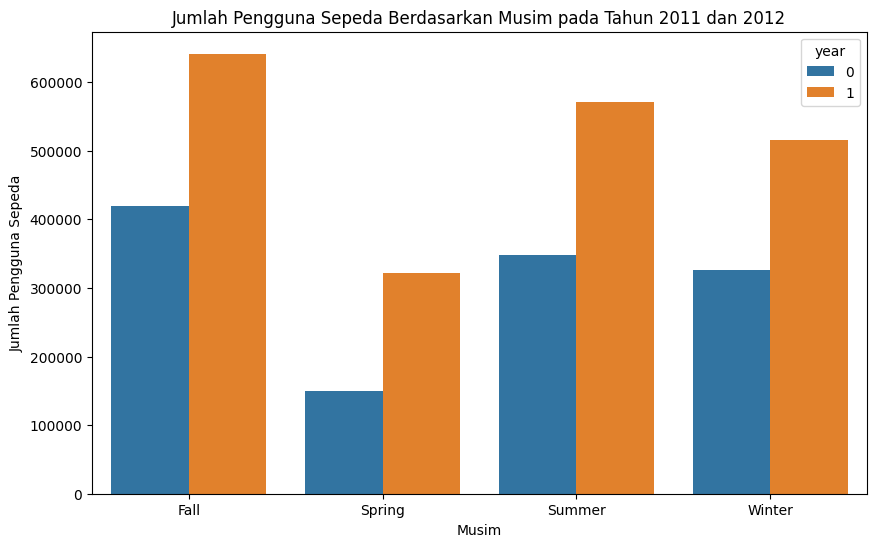

In [14]:
# Pertanyaan 1: Jumlah pengguna sepeda berdasarkan musim pada tahun 2011 dan 2012
seasonal_users = df_day.groupby(['year', 'season'])['count'].sum().reset_index()

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='count', hue='year', data=seasonal_users)
plt.title('Jumlah Pengguna Sepeda Berdasarkan Musim pada Tahun 2011 dan 2012')
plt.xlabel('Musim')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()


### Pertanyaan 2:

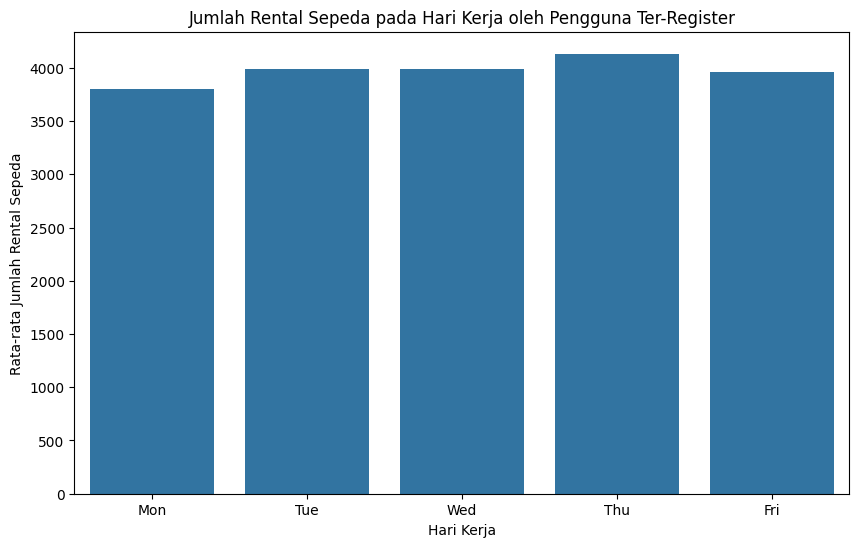

In [15]:
# Pertanyaan 2: Meningkatkan jumlah rental sepeda pada hari kerja oleh pengguna ter-register
registered_weekday = df_day[df_day['workingday'] == 1].groupby('weekday')['registered'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='registered', data=registered_weekday, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])
plt.title('Jumlah Rental Sepeda pada Hari Kerja oleh Pengguna Ter-Register')
plt.xlabel('Hari Kerja')
plt.ylabel('Rata-rata Jumlah Rental Sepeda')
plt.show()


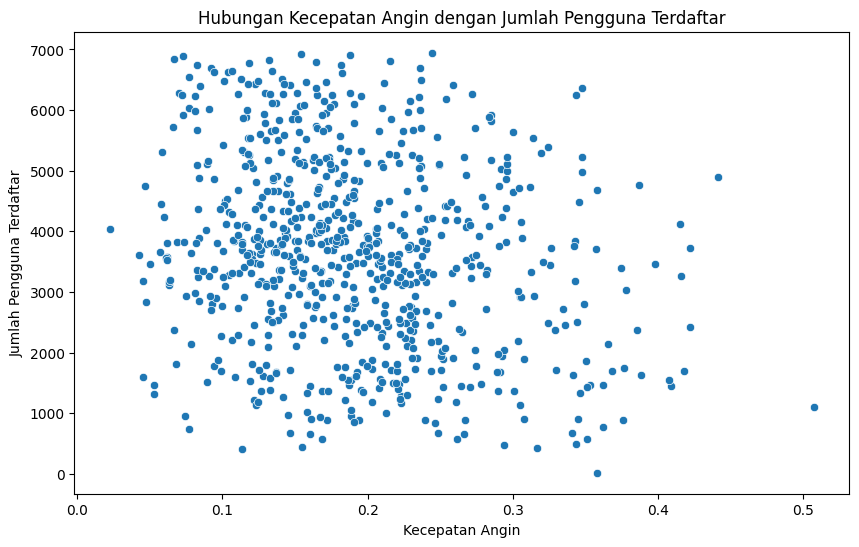

In [16]:
# Pertanyaan 3: Hubungan kecepatan angin dengan jumlah pengguna terdaftar
plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='registered', data=df_day)
plt.title('Hubungan Kecepatan Angin dengan Jumlah Pengguna Terdaftar')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Pengguna Terdaftar')
plt.show()


## Conclusion

- Conclution pertanyaan 1
 Apakah ada perbedaan jumlah pengguna sepeda berdasarkan musim pada tahun 2011 dan 2012?

Dari visualisasi, terlihat bahwa pola penggunaan sepeda berdasarkan musim pada tahun 2011 dan 2012 relatif serupa. Musim panas (Summer) memiliki jumlah pengguna sepeda yang paling tinggi, diikuti oleh musim musim semi (Spring) dan musim gugur (Fall). Musim dingin (Winter) memiliki jumlah pengguna sepeda yang paling rendah.
> Indented block


- Conclution pertanyaan 2
 Bagaimana cara meningkatkan jumlah rental sepeda pada hari kerja (workingday) oleh pengguna ter-register (registered)?

Dengan melihat grafik, terlihat bahwa pada hari kerja, pengguna ter-register lebih cenderung menyewa sepeda dibandingkan dengan hari libur. Oleh karena itu, strategi untuk meningkatkan jumlah rental sepeda pada hari kerja dapat fokus pada pengguna ter-register, seperti menawarkan promosi eksklusif atau keuntungan tambahan bagi pelanggan yang terdaftar pada hari-hari kerja tertentu.

- Conclution pertanyaan 3
Apa hubungan kecepatan angin (windspd) dengan jumlah pengguna yang terdaftar (registered)?

Dari grafik dispersi, tidak terlihat adanya pola yang jelas antara kecepatan angin dan jumlah pengguna terdaftar. Ini mungkin menunjukkan bahwa kecepatan angin tidak memiliki pengaruh signifikan terhadap jumlah pengguna terdaftar. Oleh karena itu, kecepatan angin mungkin bukan faktor kritis yang perlu dipertimbangkan dalam strategi peningkatan jumlah pengguna terdaftar.